## Trabajo Practico 2

#### Materia: Vision por Computadora 1
#### Alumno: Lucas Rivela

In [1]:
import cv2 as cv
import math
import matplotlib.pyplot as plt
import numpy as np

#### Parte 1

##### Objetivo

Implementar una funcion que genere un filtro gaussiano; que reciba como parametros: dimensiones del filtro, dimensiones del kernel, y un sigma y que devuelva el filtro y la transformada de Fourier del filtro.

Filtrar una imagen a traves de este metodo (espectral) y compararlo con un filtrado comun por convolucion.

In [2]:
def generate_kernel(k_size, sigma):
    """
    Funcion que genera un kernel gaussiano en 2D.
    Argumentos
    k_size: (int) Tamano del kernel
    sigma: (int) Para el calculo de la gaussiana
    ---------------------------------------
    Retorno
    kernel: (numpy.ndarray) Matriz que representa el kernel gaussiano
    """
    ax = np.linspace(-(k_size - 1) / 2., (k_size - 1) / 2., k_size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    kernel = kernel / np.sum(kernel)
    return kernel

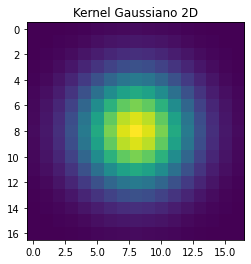

In [3]:
k = generate_kernel(17,3)
plt.title("Kernel Gaussiano 2D")
plt.imshow(k, interpolation='none')

In [4]:
def create_gauss_filter(h, w, k_size=15, sigma=5):
    """
    Funcion que genera un filtro gaussiano y su transformada de fourier.
    Argumentos
    h: (int) Altura en del filtro
    w: (int) Ancho del filtro
    k_size: (int) Tamano del kernel
    sigma: (int) Para el calculo de la gaussiana
    ---------------------------------------
    Retorno
    kernel: (numpy.ndarray) Matriz que representa el filtro gaussiano
    kernel_tf: (numpy.ndarray) Matriz que representa el filtro gaussiano con la transformada de fourier aplicada.
    """
    gaussian_kernel = generate_kernel(k_size, sigma)
    
    # Genero el canvas al cual le voy a aplicar el kernel gaussiano para generar el filtro
    canvas = np.zeros((h,w))
    
    # Centro el kernel en el canvas
    xCanvas = canvas.shape[0]
    xKernel = gaussian_kernel.shape[0]
    yCanvas = canvas.shape[1]
    yKernel = gaussian_kernel.shape[1]

    lower_x = math.ceil( (xCanvas - xKernel) / 2 )
    upper_x = lower_x + xKernel

    lower_y = math.ceil( (yCanvas - yKernel) / 2 )
    upper_y = lower_y + yKernel

    canvas[lower_x:upper_x, lower_y:upper_y] = gaussian_kernel

    # Aplico transformada de Fourier
    canvas_ft = np.fft.fft2(canvas)

    return canvas, canvas_ft

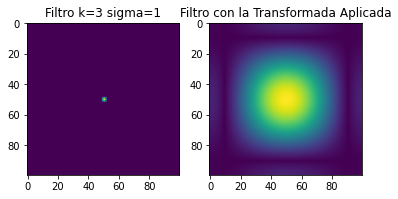

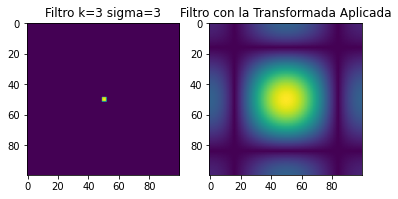

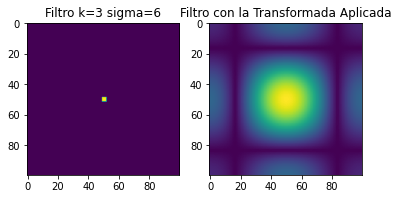

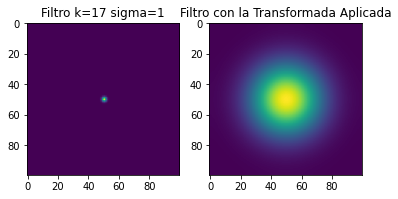

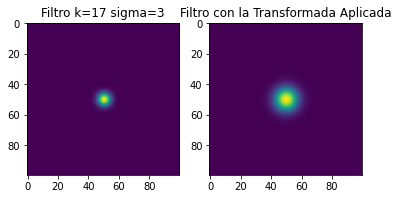

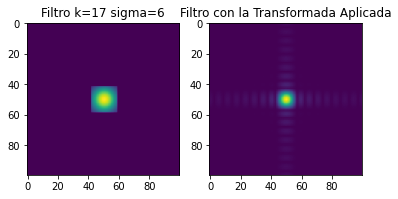

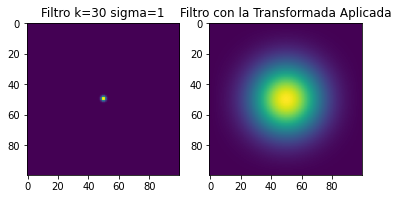

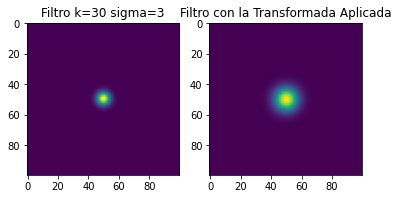

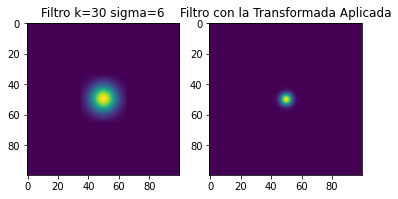

In [5]:
for kernel_size in (3,17,30):
    for sigma in (1,3,6):
        canvas, canvas_ft = create_gauss_filter(100,100,kernel_size,sigma)
        plt.subplot(1,2,1)
        plt.title(f"Filtro k={kernel_size} sigma={sigma}")
        plt.imshow(canvas)
        plt.subplot(1,2,2)
        plt.title('Filtro con la Transformada Aplicada')
        plt.imshow(np.abs(np.fft.fftshift(canvas_ft)))
        plt.show()

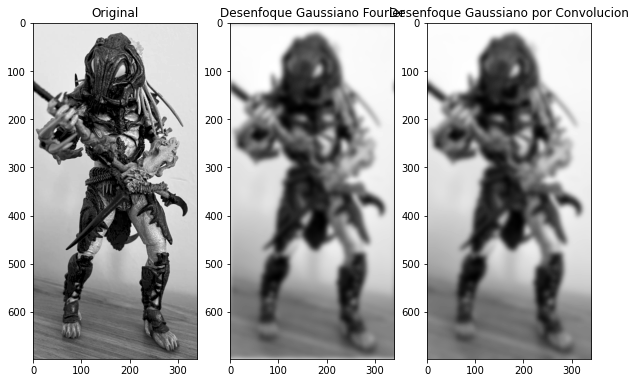

Igualdad:  False


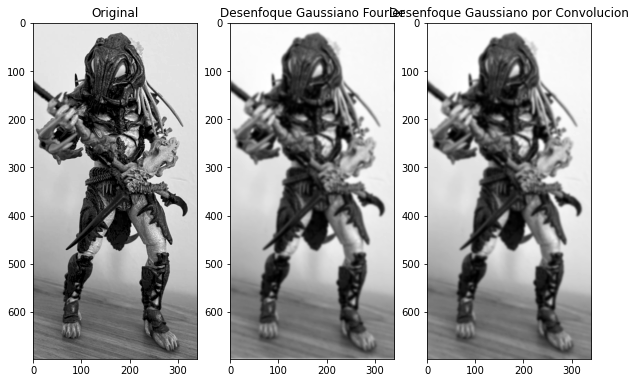

Igualdad:  False


In [8]:
# Cargo la imagen
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)
h, w = img.shape
# Aplico Transformada de Fourier a la Imagen
img_ft = np.fft.fft2(img)
# Creo filtro gaussiano con la transformada aplicada
gaussian_filter, gaussian_filter_ft = create_gauss_filter(h, w, 29, 5)
# Hago la multiplicacion elemento a elemento
filtered_ft = img_ft * gaussian_filter_ft
# Aplico la inversa de la transformada
img_filtered = np.fft.ifft2(filtered_ft)
# Me quedo con la parte real y hago shift
img_gauss = np.fft.ifftshift(np.real(img_filtered))

# Filtrado por convolución
img_gauss_conv = cv.GaussianBlur(img,ksize=(29, 29),sigmaX=5, sigmaY=5)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.title('Desenfoque Gaussiano Fourier')
plt.imshow(img_gauss, cmap='gray')
plt.subplot(1,3,3)
plt.title('Desenfoque Gaussiano por Convolucion')
plt.imshow(img_gauss_conv, cmap='gray')
plt.show()

print("Igualdad: ",np.array_equal(img_gauss, img_gauss_conv))

### REPITO LO MISMO PARA OTRO KERNEL Y SIGMA
gaussian_filter, gaussian_filter_ft = create_gauss_filter(h, w, 11, 2)
filtered_ft = img_ft * gaussian_filter_ft
img_filtered = np.fft.ifft2(filtered_ft)
img_gauss = np.fft.ifftshift(np.real(img_filtered))
img_gauss_conv = cv.GaussianBlur(img,ksize=(11, 11),sigmaX=2, sigmaY=2)

plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.title('Desenfoque Gaussiano Fourier')
plt.imshow(img_gauss, cmap='gray')
plt.subplot(1,3,3)
plt.title('Desenfoque Gaussiano por Convolucion')
plt.imshow(img_gauss_conv, cmap='gray')
plt.show()

print("Igualdad: ",np.array_equal(img_gauss, img_gauss_conv))


#### Conclusiones Parte 1

Se pudo comprobar como al jugar con el sigma y el tamaño del kernel, empiezan a aparecer "colitas" o no al aplicar la transformada de Fourier.

Luego, se puede ver como a priori la imagen filtrada de manera espectral luce igual a la filtrada por convolución, pero al hacer una comparación de las matrices resultantes, esto no es así.

Tambien se puede ver la ventaja de hacer un filtrado de manera espectral, ya que es mas simple computacionalmente de realizarlo a un filtrado por convolución.

#### Parte 2

##### Objetivo

Tomar la imagen "metal grid" y calcular los gradientes (direccion y modulo). Ver como luce la imagen de direccion y la imagen de modulo. Por ultimo, construir una imagen a color con los gradientes mas representativos.

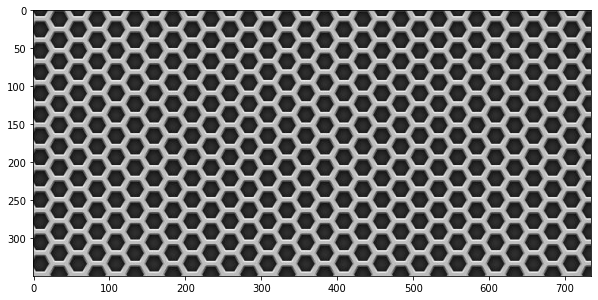

In [9]:
# Cargo la imagen
img = cv.imread('metalgrid.jpg', cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

In [10]:
# Suavizado Gaussiano
blur = cv.GaussianBlur(img,(5,5),1)

# Gradientes
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# Calculamos Magnitud
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Calculamos Direccion
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

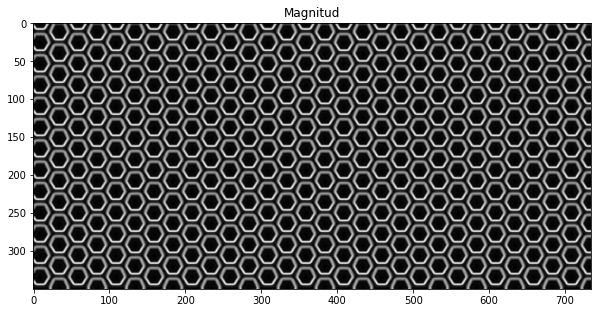

In [11]:
plt.figure(figsize=(10,10))
plt.title("Magnitud")
plt.imshow(mag, cmap='gray')

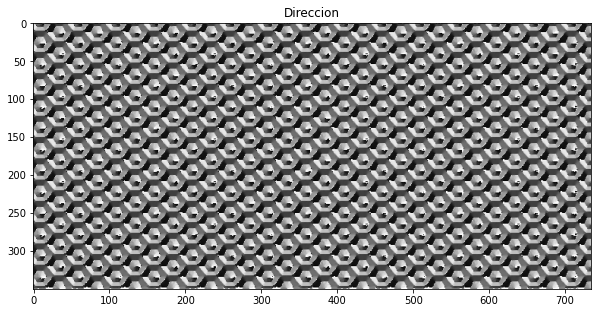

In [12]:
plt.figure(figsize=(10,10))
plt.title("Direccion")
plt.imshow(angle, cmap='gray')

In [13]:
# Colores para los gradientes
ROJO  = [255, 0, 0]
VERDE = [0, 255, 0]
AZUL  = [0, 0, 255]
MAGENTA = [255, 0, 255]
CYAN = [0, 255, 255]
AMARILLO = [255, 255, 0]
BLANCO = [255, 255, 255]

In [14]:
X,Y = mag.shape
no_max_matrix = np.zeros((X, Y), dtype=np.uint8)
color_matrix = np.zeros((X, Y, 3), dtype=np.uint8)

for i in range(1, X-1):
    for j in range(1, Y-1):
        # Angle 0
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180) or (-22.5 <= angle[i,j] < 0) or (-180 <= angle[i,j] < -157.5):
            b = mag[i, j+1]
            c = mag[i, j-1]
            color_matrix[i,j] = BLANCO
        # Angle 45
        elif (22.5 <= angle[i,j] < 67.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
            color_matrix[i,j] = ROJO
        elif (-157.5 <= angle[i,j] < -112.5):
            b = mag[i+1, j+1]
            c = mag[i-1, j-1]
            color_matrix[i,j] = VERDE
        # Angle 90
        elif (67.5 <= angle[i,j] < 112.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
            color_matrix[i,j] = AZUL
        elif (-112.5 <= angle[i,j] < -67.5):
            b = mag[i+1, j]
            c = mag[i-1, j]
            color_matrix[i,j] = MAGENTA
        # Angle 135
        elif (112.5 <= angle[i,j] < 157.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            color_matrix[i,j] = CYAN
        elif (-67.5 <= angle[i,j] < -22.5):
            b = mag[i+1, j-1]
            c = mag[i-1, j+1]           
            color_matrix[i,j] = AMARILLO

        # Supresión de no-máximos
        if (mag[i,j] >= b) and (mag[i,j] >= c):
            no_max_matrix[i,j] = mag[i,j]

highThreshold = img.max() * 0.09
lowThreshold = highThreshold * 0.65


strong_i, strong_j = np.where(no_max_matrix >= highThreshold)
zeros_i, zeros_j = np.where(no_max_matrix < lowThreshold)
weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))


color_matrix[zeros_i, zeros_j] = [0,0,0]

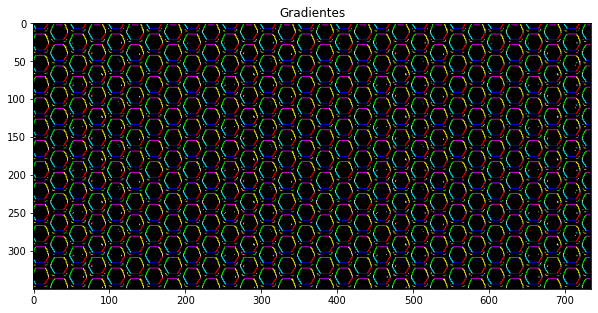

In [15]:
plt.figure(figsize=(10,10))
plt.title("Gradientes")
plt.imshow(color_matrix)

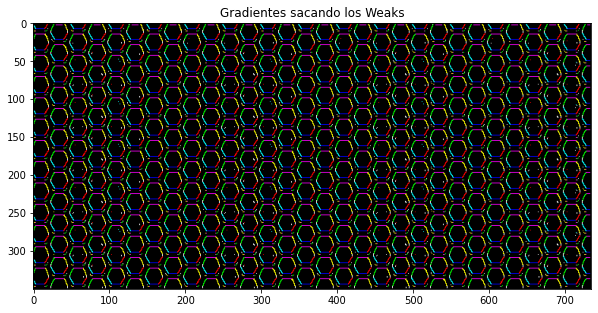

In [16]:
color_matrix[weak_i, weak_j] = [0,0,0]
plt.figure(figsize=(10,10))
plt.title("Gradientes sacando los Weaks")
plt.imshow(color_matrix)

#### Conclusiones Parte 2

Se pudo comprobar el algoritmo de detección de bordes de Canny. Utilizar el operador de Sobel sirvió para calcular los gradientes dirección y magnitud.

Luego se utilizaron estos gradientes para realizar la supresión de no-máximos, y por último, se calcularon 2 thresholds (umbral alto y bajo) para eliminar bordes con baja intensidad. Se probó dejar los valores entre esos 2 umbrales y también quitarlos, no pareciendo haber diferencias a simple vista.